Les Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Récuperer le fichier Data pour echantionner

In [3]:
data = pd.read_csv('data/to_ecolab/Savigny_le_Temple.csv')
print (data)

     YEAR  MO  DY  HR   RH2M    T2M
0    2025   1   1   0  96.91   0.26
1    2025   1   1   1  96.54   0.23
2    2025   1   1   2  96.37  -0.08
3    2025   1   1   3  96.48  -0.51
4    2025   1   1   4  96.16  -0.90
..    ...  ..  ..  ..    ...    ...
187  2025   1   8  19  95.39  10.75
188  2025   1   8  20  95.84  10.30
189  2025   1   8  21  96.54   9.74
190  2025   1   8  22  97.15   9.34
191  2025   1   8  23  97.00   9.19

[192 rows x 6 columns]


In [4]:
humidity = data['RH2M']
temperature = data['T2M']


Visualiser les donnée avant le sur-échantionnage

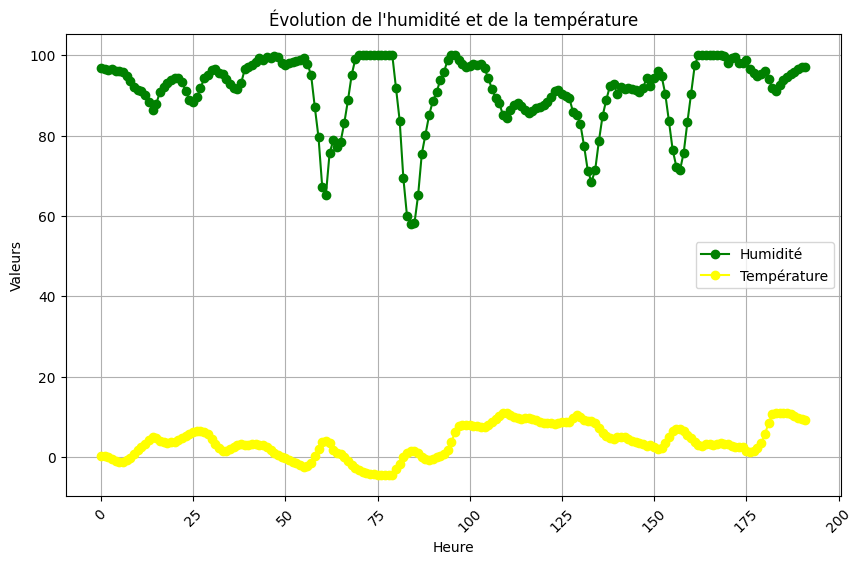

In [5]:
plt.figure(figsize=(10, 6))
plt.plot( humidity,'o-', label="Humidité", color="green")
plt.plot( temperature,'o-', label="Température", color="yellow")

# Réglage des axes et affichage propre des heures
plt.xticks(rotation=45)  # Rotation pour mieux voir les heures
plt.xlabel("Heure")
plt.ylabel("Valeurs")
plt.title("Évolution de l'humidité et de la température")

plt.legend()
plt.grid()

On va convertir les échantillons enregistrés toutes les 1 heure en échantillons toutes les 5 minutes


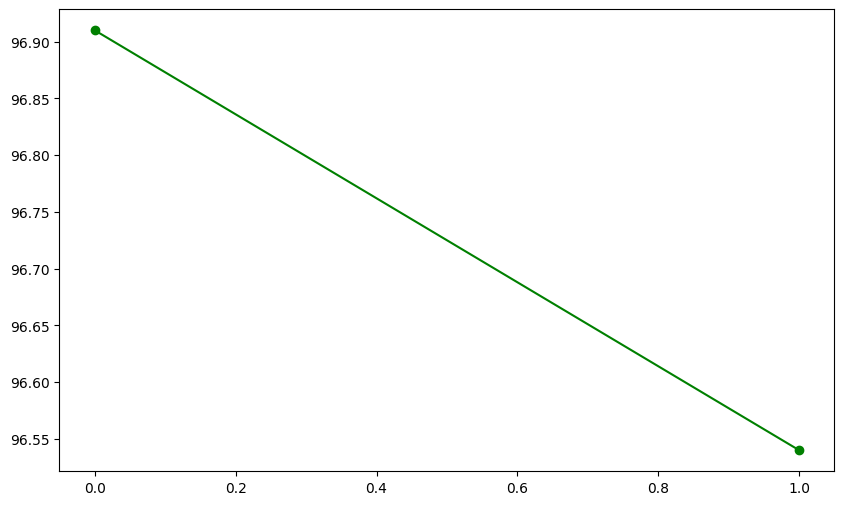

In [6]:
new = []
for i in range(0,2):
    new.append(humidity[i])

plt.figure(figsize=(10, 6))
plt.plot(new,'o-', label="Humidité", color="green")
plt.show()

on va commencer à échantionner

In [7]:

new_data= []

for i in range(len(data)-1):
    h1 , h2 = humidity[i] , humidity[i+1]
    t1 , t2 = temperature[i] , temperature[i+1]

    interpolated_humidity = np.linspace(h1 , h2 , num=12 , endpoint=False)
    interpolated_temperature = np.linspace(t1 , t2 , num=12 , endpoint=False)

    for j in range(12):
        new_data.append([interpolated_humidity[j] , interpolated_temperature[j]])



Affichage des donnée

In [8]:
for i in new_data:
    print (i)

[np.float64(96.91), np.float64(0.26)]
[np.float64(96.87916666666666), np.float64(0.2575)]
[np.float64(96.84833333333333), np.float64(0.255)]
[np.float64(96.8175), np.float64(0.2525)]
[np.float64(96.78666666666666), np.float64(0.25)]
[np.float64(96.75583333333333), np.float64(0.2475)]
[np.float64(96.725), np.float64(0.245)]
[np.float64(96.69416666666667), np.float64(0.2425)]
[np.float64(96.66333333333334), np.float64(0.24000000000000002)]
[np.float64(96.63250000000001), np.float64(0.23750000000000002)]
[np.float64(96.60166666666667), np.float64(0.23500000000000001)]
[np.float64(96.57083333333334), np.float64(0.2325)]
[np.float64(96.54), np.float64(0.23)]
[np.float64(96.52583333333334), np.float64(0.20416666666666666)]
[np.float64(96.51166666666667), np.float64(0.17833333333333334)]
[np.float64(96.4975), np.float64(0.15250000000000002)]
[np.float64(96.48333333333333), np.float64(0.12666666666666668)]
[np.float64(96.46916666666667), np.float64(0.10083333333333336)]
[np.float64(96.45500000

Enregistrer en format **.csv**


In [19]:
data_new = pd.DataFrame(new_data , columns=['humidity', 'temperature'])
data_new['humidity'] = data_new['humidity'].astype(float)
data_new['humidity'] = data_new['humidity'].map(lambda x: f"{x:.2f}".replace('.', ','))
data_new['temperature'] = data_new['temperature'].astype(float)
data_new['temperature'] = data_new['temperature'].map(lambda x: f"{x:.2f}".replace('.', ','))
print (data_new['temperature'])

0       0,26
1       0,26
2       0,26
3       0,25
4       0,25
        ... 
2287    9,25
2288    9,24
2289    9,23
2290    9,21
2291    9,20
Name: temperature, Length: 2292, dtype: object


In [20]:
data_new.to_csv('Ecolab/Savigny_le_Temple.csv', index=False , sep = ";")